In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

# 1.1 Movielens full - EDA

# A

In [2]:
# EDA
df_movies.info(), df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


(None, None)

In [3]:
df_movies.describe()

,movieId
count,58098.000000
mean,111919.516197
std,59862.660956
min,1.000000
25%,72437.750000
50%,126549.000000
75%,161449.500000
max,193886.000000


In [4]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,2.775344e+07,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00,1.193122e+09
std,8.170740e+04,3.510263e+04,1.066353e+00,2.160482e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,7.117600e+04,1.097000e+03,3.000000e+00,9.986053e+08
50%,1.420220e+05,2.716000e+03,3.500000e+00,1.174256e+09
75%,2.124590e+05,7.150000e+03,4.000000e+00,1.422744e+09
max,2.832280e+05,1.938860e+05,5.000000e+00,1.537945e+09


In [5]:
df_ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [6]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [7]:
# Merges the two dataframes
df = pd.merge(df_movies, df_ratings, on='movieId')

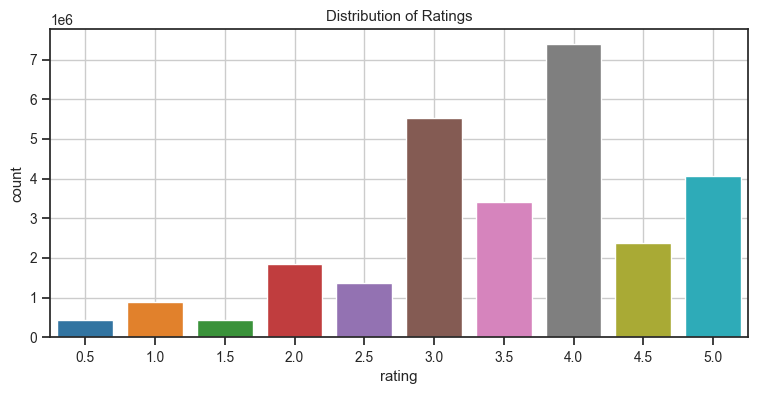

In [8]:
n_users = df_ratings['userId'].nunique()
n_movies = df_ratings['movieId'].nunique()

# Set figsize to 10,6
plt.figure(figsize=(9,4))
sns.set_style('ticks')
sns.set_context('notebook', font_scale=.9)
sns.countplot(data=df_ratings, x='rating')
plt.title('Distribution of Ratings')
plt.grid()
plt.show()

# B

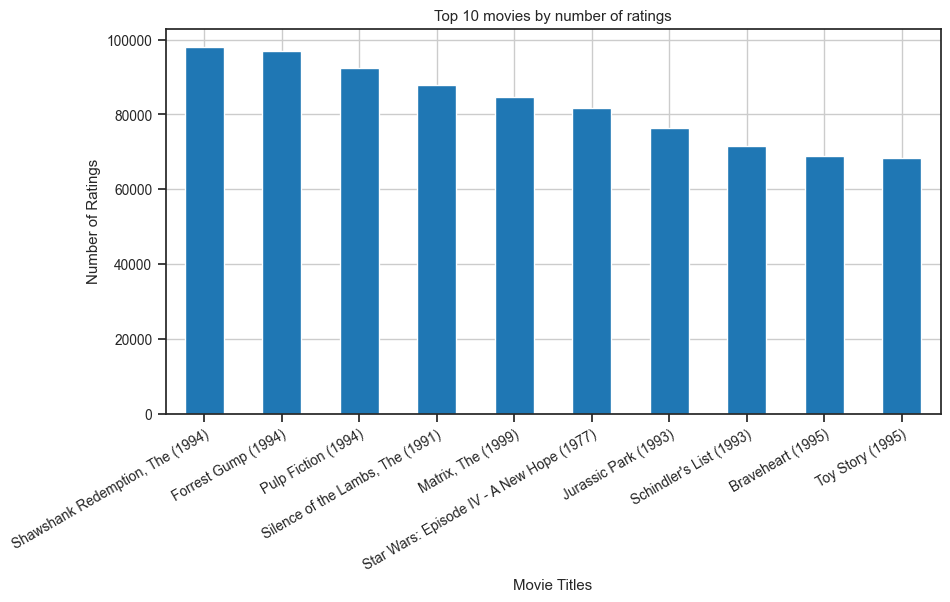

In [9]:
# sort movies by number of ratings
df.groupby('title')['userId'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.xlabel('Movie Titles')
plt.ylabel('Number of Ratings')
plt.title('Top 10 movies by number of ratings')
plt.grid()

In [10]:
top_rated_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

## C

In [11]:
# loops through list of top rated movies and plot the average ratings for each movie

for movie in top_rated_movies.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    print(f"{movie}: {average_rating:.2f}")


Shawshank Redemption, The (1994): 4.42
Forrest Gump (1994): 4.06
Pulp Fiction (1994): 4.17
Silence of the Lambs, The (1991): 4.15
Matrix, The (1999): 4.15
Star Wars: Episode IV - A New Hope (1977): 4.12
Jurassic Park (1993): 3.67
Schindler's List (1993): 4.26
Braveheart (1995): 4.01
Toy Story (1995): 3.89


## D

In [12]:
# creates new column with year of release
# extract the year from the title column using regex
# \(: = start of expression
# (\d{4}): = 4 digits next to each other
# \): = end of expression
# $: all of the above must occur at the end of the string
# Source: https://stackoverflow.com/questions/64323346/extracting-year-from-a-column-of-string-movie-names
df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])

In [13]:
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int

In [14]:
# finds all years between 1 and 2020 ()

df_years = df[(df['year'] > 1) & (df['year'] < 2022)] # removes all movies with year 0


In [15]:
df_years['year'].min(), df_years['year'].max()

(1874, 2018)

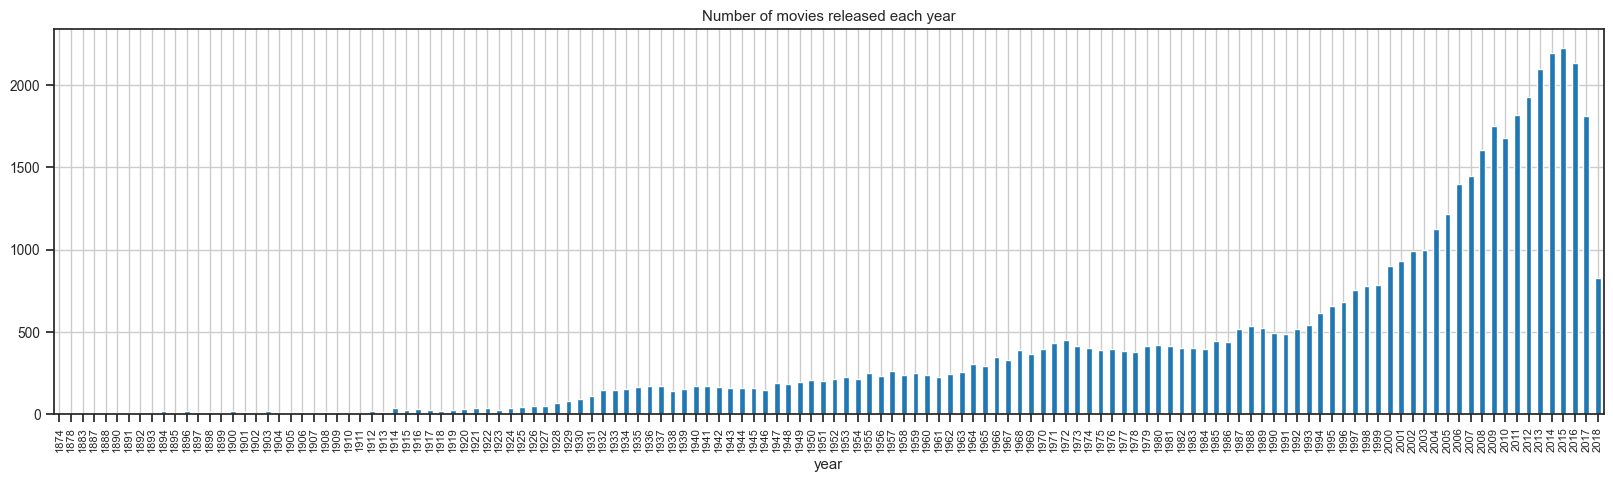

In [16]:
# plot the number of movies released each year

df_years.groupby('year')['title'].nunique().plot(kind='bar', figsize=(20, 5))
plt.title('Number of movies released each year')
# changet xticks font size
plt.xticks(fontsize=8)
plt.grid()

C:\Users\Danne\AppData\Local\Temp\ipykernel_25196\942738601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_years['decade'] = df_years['year'] // 10 * 10 #


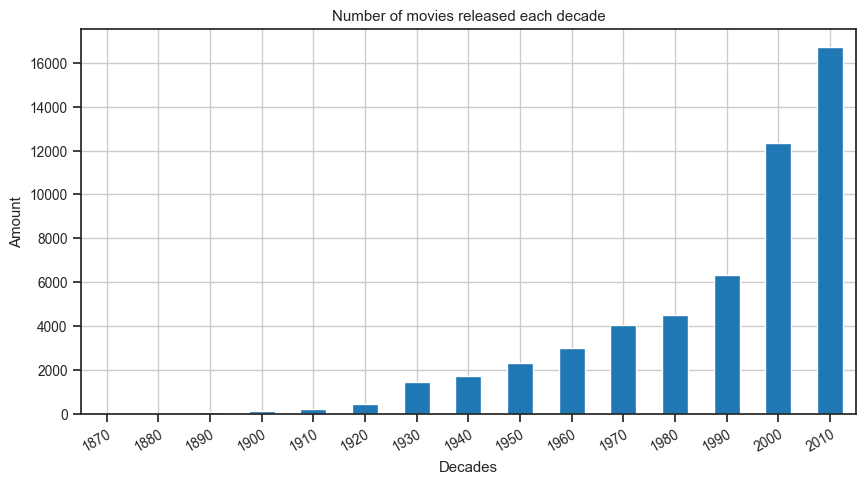

In [17]:
# groups up years in to decades which makes it easier to read the graph

df_years['decade'] = df_years['year'] // 10 * 10 # 

# change x-axis to show decades instead of years
df_years.groupby('decade')['title'].nunique().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=30, rotation_mode="anchor", ha="right");
plt.xlabel('Decades')
plt.ylabel('Amount')
plt.grid()
plt.title('Number of movies released each decade');

## E

In [18]:
# create a new column with the total ratings for each movie
df['total_ratings'] = df.groupby('title')['rating'].transform('count')

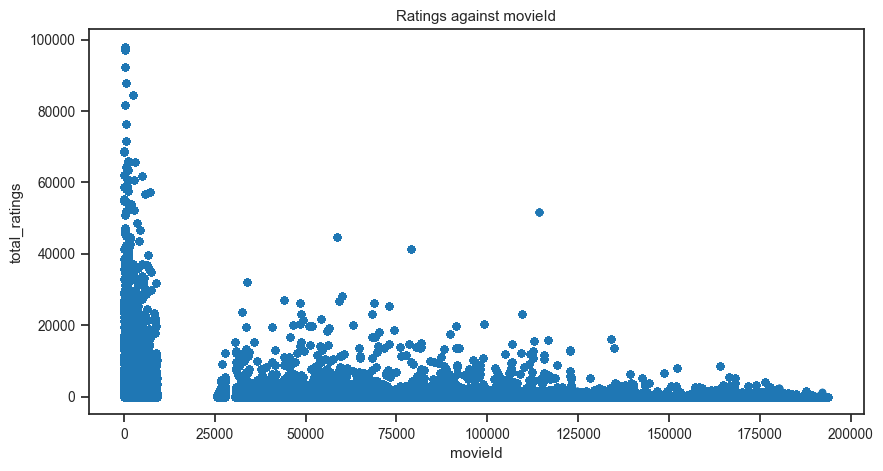

In [19]:
df.plot(x='movieId', y='total_ratings', kind='scatter', figsize=(10, 5))
plt.title('Ratings against movieId');

In [20]:
len(df['movieId'].unique())

53889

In [21]:
len(df['rating'])

27753444

## F

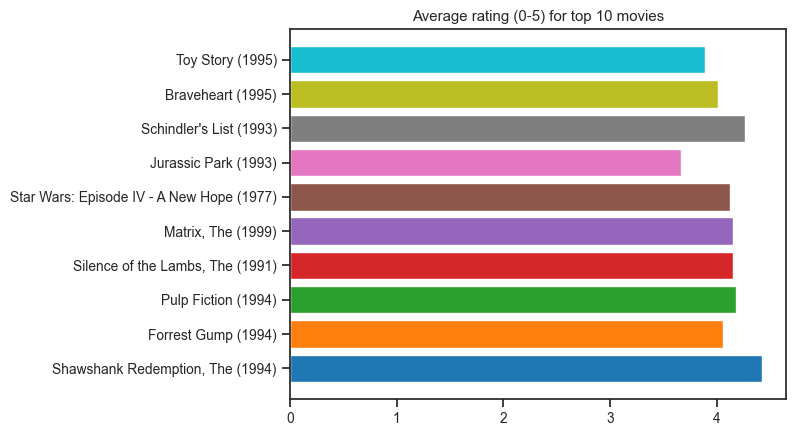

In [22]:
for movie in top_rated_movies.index:
    average_rating = df[df['title'] == movie]['rating'].mean()
    plt.barh(movie, average_rating)
    plt.title('Average rating (0-5) for top 10 movies')

# More EDA: 

In [23]:
# putting important lines of code to ease the process of re-running the code

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

df = pd.merge(df_movies, df_ratings, on='movieId')

df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False)
df["year"] = pd.to_numeric(df["year"])
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int
df_years = df[(df['year'] > 1) & (df['year'] < 2022)]
df['average_rating'] = df.groupby('movieId')['rating'].transform('mean');
df['number_of_ratings'] = df.groupby('movieId')['rating'].transform('count');
df = df[df['number_of_ratings'] > 500]
df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, '10 Lowest rated movies (50000+ ratings or more)')

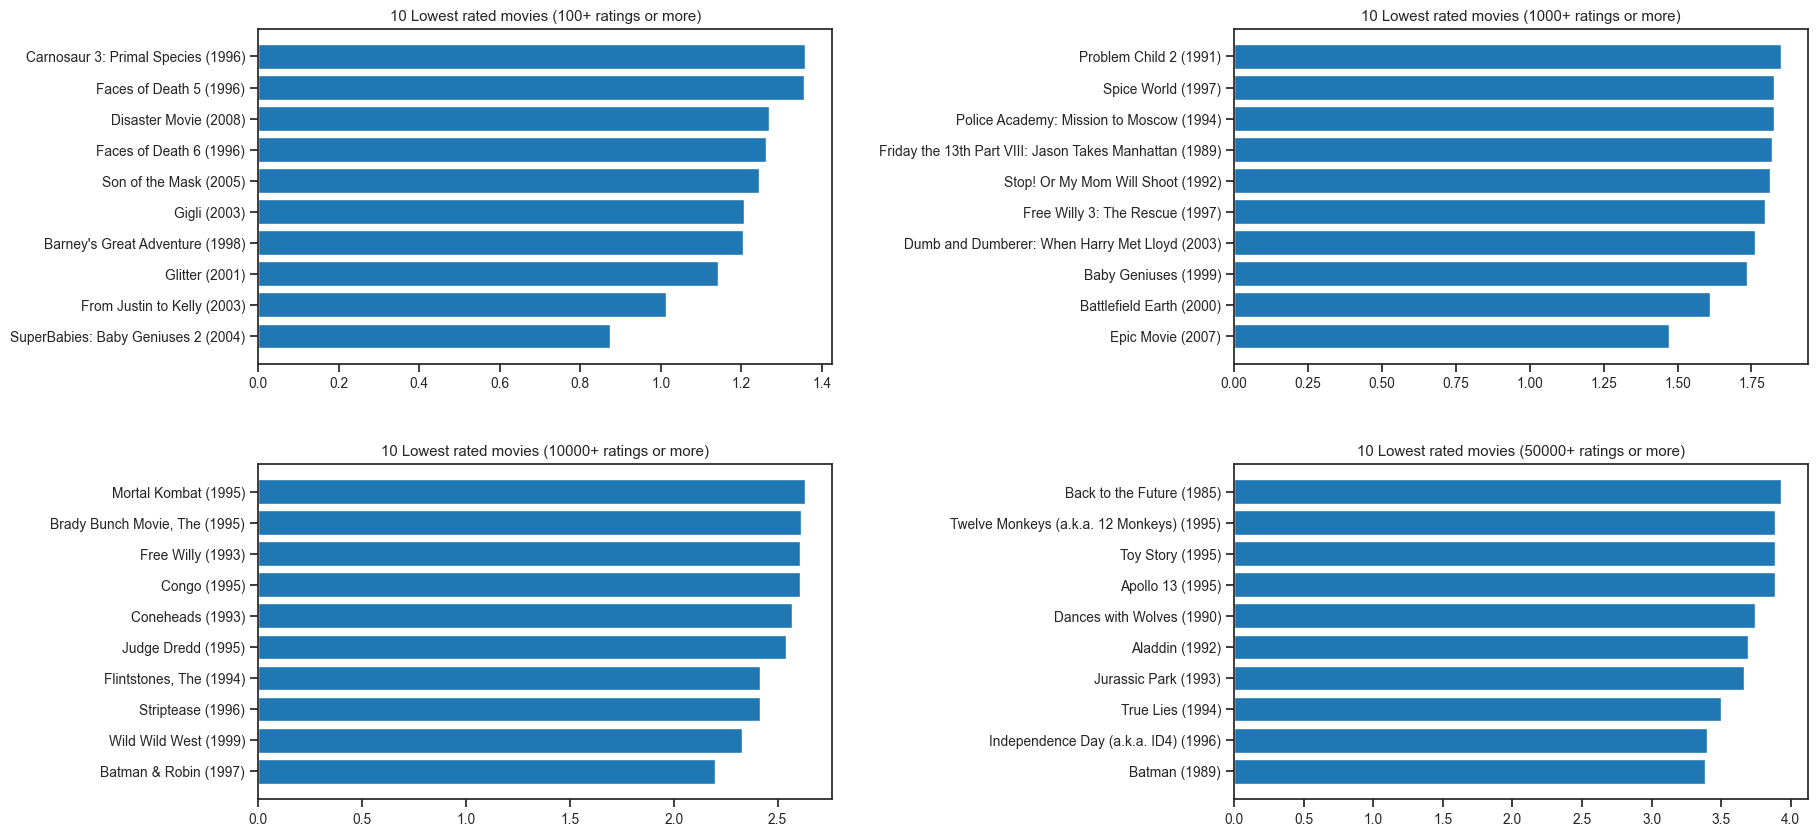

In [24]:
# Creates subplots for the 10 lowest rated movies with different amount of ratings
df_lowest_rated = df.sort_values(by='average_rating', ascending=True)

# removes duplicates
df_lowest_rated = df_lowest_rated.drop_duplicates(subset='title', keep='first')

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# changes size of subplots
fig.subplots_adjust(hspace=0.3, wspace=0.7)

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 100]
axs[0, 0].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[0, 0].set_title('10 Lowest rated movies (100+ ratings or more)')

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 1000]
axs[0, 1].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[0, 1].set_title('10 Lowest rated movies (1000+ ratings or more)')

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 10000]
axs[1, 0].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[1, 0].set_title('10 Lowest rated movies (10000+ ratings or more)')

df_lowest_rated = df_lowest_rated[df_lowest_rated['number_of_ratings'] > 50000]
axs[1, 1].barh(df_lowest_rated["title"].head(10), df_lowest_rated["average_rating"].head(10))
axs[1, 1].set_title('10 Lowest rated movies (50000+ ratings or more)')

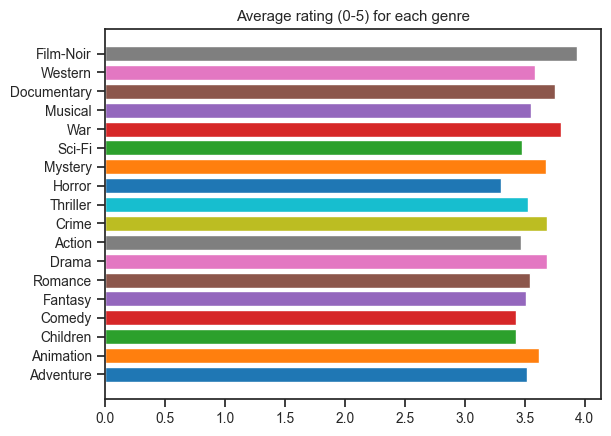

In [25]:
# compares the average rating for each genre
# since df['genres'] includes multiple genres for each movie, I needed to split them up and loop through this list instead
# These are all the genres i could find in the dataset
genre_list = ["Adventure", "Animation", "Children", "Comedy", "Fantasy", "Romance", "Drama", "Action", "Crime", "Thriller", "Horror", "Mystery", "Sci-Fi", "War", "Musical", "Documentary", "Western", "Film-Noir"]
sorting_list = []

# loops through each genre and finds the average rating for each genre
for genre in genre_list:
    average_rating = df[df['genres'].str.contains(genre)]['average_rating'].mean()
    sorting_list.append([genre, average_rating])
    plt.barh(genre, average_rating)
    plt.title('Average rating (0-5) for each genre')

In [26]:
# sorts the list by the second element in each list (the average rating)
sorting_list.sort(key=lambda x: x[1], reverse=True) # source: https://stackoverflow.com/questions/3766633/how-to-sort-with-lambda-in-python

for i in range(len(sorting_list)): # prints the list
    print(f"{sorting_list[i][0]}: {sorting_list[i][1]:.2f}") # prints the genre and the average rating

Film-Noir: 3.94
War: 3.80
Documentary: 3.75
Crime: 3.69
Drama: 3.69
Mystery: 3.67
Animation: 3.61
Western: 3.59
Musical: 3.55
Romance: 3.55
Thriller: 3.52
Adventure: 3.52
Fantasy: 3.51
Sci-Fi: 3.48
Action: 3.47
Children: 3.43
Comedy: 3.42
Horror: 3.30


# 1.2 Create a sparse matrix

- Removes certain genres I'm not interested in
- Most movies that has a score below 3 are very hit or miss, while movies that I watch that are 3 or greater are almost always pretty good
- removed movies with less than 500 ratings because it will also be very hit or miss whether the rating is accurate or not.
- removes all movies made before 1970
- removes movies with incorrect year or no year

In [27]:
import pandas as pd

df_movies = pd.read_csv("../Labb/Big/movies.csv")
df_ratings = pd.read_csv("../Labb/Big/ratings.csv")

df = pd.merge(df_movies, df_ratings, on='movieId') # merges the two dataframes on the movieId column

df["year"] = df["title"].str.extract(r"\((\d{4})\)$", expand=False) # extracts the year from the title
df["year"] = pd.to_numeric(df["year"]) # converts from string to float
df['year'] = df['year'].fillna(0).astype(int) # converts from float to int
df_years = df[(df['year'] > 1) & (df['year'] < 2022)] # removes movies without a year and movies that might have incorrect year (higher than 2022)

In [28]:
# For loop that removes certain genres from the dataset
genrelist = ["Children", "Sci-Fi", "Musical", "Documentary", "Romantic"]
for genre in genrelist:
    df = df[df['genres'].str.contains(genre) == False]

# Removes all movies that were created before 1970
df = df[df['year'] > 1970]

In [29]:
# Creates two new columns that include the average rating and number of ratings for each movie
df['average_rating'] = df.groupby('movieId')['rating'].transform('mean');
df['number_of_ratings'] = df.groupby('movieId')['rating'].transform('count');
df.reset_index(drop=True, inplace=True)

In [30]:
df = df[df['average_rating'] > 3] # removes all movies with an average rating below 3
df = df[df['number_of_ratings'] > 500] # removes all movies with less than 500 ratings

In [31]:
from scipy.sparse import csc_matrix

# applies the same filter to df_movies as df - only keeps movies that fit the filter
df_movies = df_movies[df_movies['title'].isin(df['title'])].reset_index(drop=True)

# picks out all unique movieId's and userId's this makes sure that indexing is correct
movies_cat = pd.Categorical(df['movieId'], categories=df_movies['movieId'])
users_cat = pd.Categorical(df['userId'])

# Skips creating pivot table since it works just aswell with going directly to csc_matrix and is faster
mat_movies_users = csc_matrix((df['rating'], (movies_cat.codes, users_cat.codes)))

In [32]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

model_knn = NearestNeighbors(metric='cosine', algorithm='auto', n_neighbors=20)
model_knn.fit(mat_movies_users)

NearestNeighbors(metric='cosine', n_neighbors=20)

In [33]:
def recommender(movie_name, data, model, n_recommendations):
    idx=process.extractOne(movie_name, df_movies['title'])[2] # Extracting the index of the movie
    print('Movie Selected: ', df_movies['title'][idx], 'Index: ', idx) # Printing the movie and index
    print('Searching for recommendations...') # Printing message
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations+1) # Extracting distances and indices
    for i in indices[0][1:]: # [1:] skips the movie that the user wrote in
        print(df_movies['title'][i]) # finds movie index in df_movies and prints the title
    
    print(indices[0][1:])
    print(distances[0][1:]) # prints the score of the movie in how similar it is to the searched movie (lower is "better"/closer to searched movie)

recommender('Shawshank redemption', mat_movies_users, model_knn, 5)

Movie Selected:  Shawshank Redemption, The (1994) Index:  158
Searching for recommendations...
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Forrest Gump (1994)
Schindler's List (1993)
Usual Suspects, The (1995)
[148 279 180 257  29]
[0.36242655 0.38333223 0.38455683 0.39854393 0.40554278]


# Index tester

In [34]:
import numpy as np

# tests if the sum of the ratings for each movie is the same in the dataframe and the sparse matrix
# they are the same up until 814 or 816, then they differ - becomes false - this is not the case after pd.categorical is applied before sparse matrix
def test(indices):
    for idx in indices:
        id = df_movies.loc[idx]["movieId"]
        sum_dataframe = df[df["movieId"] == id]["rating"].sum()
        sum_matrix = mat_movies_users[idx].sum()

        print(f"Comparing index {idx}, result: {sum_dataframe == sum_matrix}")

indices = np.random.randint(1000, 1216, 10)
test(indices)

Comparing index 1078, result: True
Comparing index 1121, result: True
Comparing index 1157, result: True
Comparing index 1143, result: True
Comparing index 1079, result: True
Comparing index 1130, result: True
Comparing index 1110, result: True
Comparing index 1117, result: True
Comparing index 1175, result: True
Comparing index 1202, result: True


- Det logiska felet i det här fallet var delvis att vi använde "model.fit" igen i funktionen som vi redan hade gjort utanför funktionen
- När han också använde ".where" som jag inte är helt säker gav korrekt indexen. Skrev om for-lopen men ingen skillnad.
- Det här systemet verkar inte vara särskilt bra overall, eftersom rekommendationen baseras på hur lik användarnas ratings är på andra filmer gentemot vad du söker på. Det känns rimligt om man vill ha en film som är ungefär lika omtyckt, men inte så användbar ifall man vill ha en film som skulle vara lik i form av genre.
- Vad som är viktigt att fråga sig själv är: Vad vill jag ha för rekommendationer? Först och främst vill jag ha en film som är lik i genre. Vill jag sedan ha en film är bra eller dålig som baseras på det jag söker på? Hur skulle man kunna implementera detta i funktionen? 
- Det blir inkorrekt på det rensade stora datasetet vid index 814 före vi löste det logiska problemet med pd.categorical som fixar indexen
- Dessutom så hade pivot-tabel inte lika många rader, det saknades 2 rader från totalen, som då troligtvis blev fel runt index 814-816

- Det logiska problemet låg alltså i hur indexen blev fel när vi tog datasetet och gjorde det till en sparse-matris.
- Använder vi pd.Categorical() så plockar vi endast ut alla unika movieIds, vilket gör att inga rader blir fel.
- När vi sedan testar i test-funktionen så blir alla rader True, inga False någonstans.
- Andreas hittade lösningen med pd.Categorical, som löste problemet med indexen.